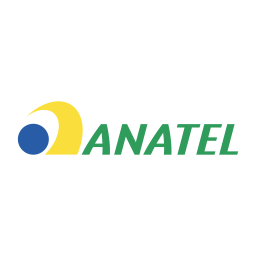

# Análise de Dados Telefônicos

* Este programa permite pesquisar e filtrar dados telefônicos com base em diferentes critérios, como ano, mês, estado, DDD e sinal. Você também pode salvar os resultados em um arquivo Excel.

In [1]:
import pandas as pd
import basedosdados as bd

# Para carregar o dado direto no pandas
df = bd.read_table(dataset_id='br_anatel_telefonia_movel',
table_id='ddd',
billing_project_id="av2-py", reauth=True)                           

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-3425ks60hkk80fssi9vpohv88g6q1iqd.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform&state=GB695xfqjyGnIImJEtCFTrQ30yCWsG&access_type=offline


Downloading: 100%|███████████████████████████████████████████████████████████| 55043/55043 [00:06<00:00, 9100.46rows/s]


## Dicionario de Dados


| Campo  | Descrição                          |
|:------:|:----------------------------------:| 
| Ano - Int    | Ano da pesquisa                    |
| Mês - Int   | Mês da pesquisa                    |
| Estado - String  | Sigla do estado                    |
| DDD - Int   | Código DDD da região               |
| Sinal - String  | Tipo de sinal de telefonia ou dados|


In [2]:
df = df.drop(['tecnologia', 'acessos'], axis=1)


In [3]:
df.columns= ['Ano','Mes','Estado','DDD','Sinal']


In [4]:
display(df)

,Ano,Mes,Estado,DDD,Sinal
0,2009,2,AC,68,2G
1,2009,2,AC,68,2G
2,2009,2,AC,68,3G
3,2009,2,AC,68,2G
4,2009,2,AC,68,2G
...,...,...,...,...,...
55038,2021,7,SP,19,3G
55039,2021,7,TO,63,2G
55040,2021,7,TO,63,2G
55041,2021,7,TO,63,4G


## Opções de Pesquisa

Existem cinco opções de pesquisa disponíveis:

1. Ano - Filtra por um ano específico.

2. Mês - Filtra por um mês específico.

3. Estado - Filtra por sigla de estado.

4. DDD - Filtra por código DDD.

5. Sinal - Filtra por tipo de sinal (1G, 2G, 3G, 4G, M2M).

In [5]:
df ['Ano'] = df['Ano'].astype(int)
df ['Mes'] = df['Mes'].astype(int)

In [6]:
import os
from pathlib import Path

while True:
    # Exibe as opções do menu
    print("Opções:")
    print("1 - Ano")
    print("2 - Mês")
    print("3 - Estado")
    print("4 - DDD")
    print("5 - Sinal")

    # Solicita ao usuário que digite uma opção
    Opcao = input("Digite uma Opção: ")

    if Opcao == '1':
        # Opção 1 - Filtrar por Ano
        print("\n### Opção 1 - Filtrar por Ano \n")
        print("Nesta opção, você pode filtrar os dados telefônicos por ano. Digite o ano desejado (2009 a 2021) e o programa exibirá os resultados correspondentes.")

        while True:
            try:
                # Solicita ao usuário que digite o ano
                Ano = int(input("Digite o ano que deseja pesquisar (2009 a 2021): "))
                if Ano < 2009 or Ano > 2021:
                    print("Ano inválido! Digite um ano entre 2009 e 2021.")
                    continue
                break
            except ValueError:
                print("Ano inválido! Digite um valor numérico.")

        # Filtra os dados do DataFrame pelo ano
        df_resultado = df.query(f"Ano == {Ano}")
        if df_resultado.empty:
            print("Nenhum resultado encontrado para o ano especificado.")
        else:
            print(df_resultado)

    elif Opcao == '2':
        # Opção 2 - Filtrar por Mês
        print("\n### Opção 2 - Filtrar por Mês \n")
        print("Nesta opção, você pode filtrar os dados telefônicos por mês. Digite o número do mês desejado e o programa exibirá os resultados correspondentes.")

        while True:
            try:
                # Solicita ao usuário que digite o número do mês
                Mes = int(input("Digite o número do mês que deseja pesquisar: "))
                if Mes < 1 or Mes > 12:
                    print("Mês inválido! Digite um número de mês entre 1 e 12.")
                    continue
                break
            except ValueError:
                print("Mês inválido! Digite um valor numérico.")

        # Filtra os dados do DataFrame pelo mês
        df_resultado = df.query(f"Mes == {Mes}")
        if df_resultado.empty:
            print("Nenhum resultado encontrado para o mês especificado.")
        else:
            print(df_resultado)

    elif Opcao == '3':
        # Opção 3 - Filtrar por Estado
        print("\n### Opção 3 - Filtrar por Estado \n")
        print("Nesta opção, você pode filtrar os dados telefônicos por estado. Digite a sigla do estado que deseja pesquisar e o programa exibirá os resultados correspondentes.")

        while True:
            # Solicita ao usuário que digite a sigla do estado
            Estado = input("Digite a sigla do estado que deseja pesquisar: ").upper()
            if Estado not in df['Estado'].unique():
                print("Estado inválido! Digite a sigla de um estado válido.")
            else:
                break

        # Filtra os dados do DataFrame pelo estado
        df_resultado = df.query(f"Estado == '{Estado}'")
        if df_resultado.empty:
            print("Nenhum resultado encontrado para a sigla de estado especificada.")
        else:
            print(df_resultado)

    elif Opcao == '4':
        # Opção 4 - Filtrar por DDD
        print("\n### Opção 4 - Filtrar por DDD \n")
        print("Nesta opção, você pode filtrar os dados telefônicos por DDD. Digite o DDD que deseja pesquisar e o programa exibirá os resultados correspondentes.")

        while True:
            # Solicita ao usuário que digite o DDD
            DDD = input("Digite o DDD que deseja pesquisar: ")
            if not DDD.isdigit():
                print("DDD inválido! Digite apenas números.")
            elif DDD not in df['DDD'].unique():
                print("DDD não encontrado na base de dados.")
            else:
                break

        # Filtra os dados do DataFrame pelo DDD
        df_resultado = df.query(f"DDD == '{DDD}'")
        if df_resultado.empty:
            print("Nenhum resultado encontrado para o DDD especificado.")
        else:
            print(df_resultado)

    elif Opcao == '5':
        # Opção 5 - Filtrar por Sinal
        print("\n### Opção 5 - Filtrar por Sinal \n")
        print("Nesta opção, você pode filtrar os dados telefônicos por tipo de sinal. Digite o tipo de sinal desejado (1G, 2G, 3G, 4G, M2M) e o programa exibirá os resultados correspondentes.")

        while True:
            # Solicita ao usuário que digite o tipo de sinal
            Sinal = input("Digite o sinal que deseja pesquisar (1G, 2G, 3G, 4G, M2M): ")
            if Sinal.lower() not in ['1g', '2g', '3g', '4g', 'm2m']:
                print("Sinal inválido! Digite um tipo de sinal válido.")
            else:
                break

        # Filtra os dados do DataFrame pelo tipo de sinal
        df_resultado = df[df['Sinal'].str.contains(Sinal.upper())]
        if df_resultado.empty:
            print("Nenhum resultado encontrado para o tipo de sinal especificado.")
        else:
            print(df_resultado)

    else:
        # Opção inválida
        print("\nOpção Inválida!")
        continue

    while True:
        # Solicita ao usuário se deseja salvar como arquivo Excel
        Salvar = input("\nDeseja salvar como arquivo Excel? (sim/não): ").lower()
        if Salvar in ["sim", "sím", "nao", "não"]:
            break
        else:
            print("\nOpção Inválida! Digite 'sim' para salvar ou 'não' para não salvar.")

    if Salvar == "sim":
        # Solicita ao usuário que digite o nome do arquivo
        nome_arquivo = input("Digite o nome do arquivo: ")

        while True:
            # Solicitar diretório de salvamento ou usar "Downloads" por padrão
            diretorio = input("Digite o diretório onde deseja salvar o arquivo (deixe em branco para salvar em 'Downloads'): ")
            if not diretorio:
                diretorio = str(Path.home() / "Downloads")

            if os.path.exists(diretorio):
                break
            else:
                print("Diretório inválido! Verifique se o diretório existe e tente novamente.")

        # Combinar diretório e nome do arquivo
        caminho_arquivo = os.path.join(diretorio, f"{nome_arquivo}.xlsx")

        if Opcao in ['1', '2', '3', '4', '5']:
            if os.path.exists(caminho_arquivo):
                substituir = input("Um arquivo com o mesmo nome já existe. Deseja substituí-lo? (sim/não): ").lower()
                if substituir == "não":
                    continue  # Volta ao início do loop

            try:
                # Salva o DataFrame filtrado como um arquivo Excel
                df_resultado.to_excel(caminho_arquivo, index=False)
                print(f"Arquivo salvo com sucesso em '{caminho_arquivo}'!")
            except Exception as e:
                print(f"Erro ao salvar o arquivo: {str(e)}")
                continue  # Volta ao início do loop
        else:
            # Opção inválida
            print("Opção inválida!")
            continue  # Volta ao início do loop

    while True:
        # Solicita ao usuário se deseja realizar outra pesquisa
        continuar = input("\nDeseja realizar outra pesquisa? (sim/não): ").lower()
        if continuar in ["sim", "sím", "nao", "não"]:
            break
        else:
            print("\nOpção Inválida! Digite 'sim' para realizar outra pesquisa ou 'não' para encerrar.")

    if continuar != "sim":
        break  # Encerra o loop e finaliza o programa

print("\nPrograma Encerrado!")


Opções:
1 - Ano
2 - Mês
3 - Estado
4 - DDD
5 - Sinal
Digite uma Opção: 3

### Opção 3 - Filtrar por Estado 

Nesta opção, você pode filtrar os dados telefônicos por estado. Digite a sigla do estado que deseja pesquisar e o programa exibirá os resultados correspondentes.
Digite a sigla do estado que deseja pesquisar: ba
        Ano  Mes Estado DDD Sinal
30     2009    2     BA  71    2G
31     2009    2     BA  71    2G
32     2009    2     BA  71    3G
33     2009    2     BA  71    2G
34     2009    2     BA  71    2G
...     ...  ...    ...  ..   ...
54837  2021    7     BA  75    3G
54838  2021    7     BA  77    2G
54839  2021    7     BA  77    2G
54840  2021    7     BA  77    4G
54841  2021    7     BA  77    3G

[4219 rows x 5 columns]

Deseja salvar como arquivo Excel? (sim/não): sim
Digite o nome do arquivo: bahia
Digite o diretório onde deseja salvar o arquivo (deixe em branco para salvar em 'Downloads'): 
Arquivo salvo com sucesso em 'C:\Users\caior\Downloads\bahia.xlsx'!



###  ------------------------------------------------------------------- CONCLUSÃO ---------------------------------------------------------------------
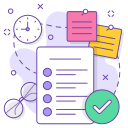

* Para concluir, este trabalho possui um programa de filtragem de dados telefônicos com base em diferentes critérios, como ano, mês, estado, DDD e tipo de sinal. 

* Também foi adicionado a funcionalidade de salvar os resultados filtrados em um arquivo Excel, permitindo que o usuário armazene e compartilhe os dados.

* Esta implementação também incluiu melhorias, como a validação dos dados de entrada fornecidos pelo usuário para garantir que sejam válidos e a possibilidade de escolher o diretório de salvamento do arquivo Excel.

* No geral, este trabalho demonstrou a utilização de estruturas de controle, manipulação de dados e interação com o usuário por meio do terminal.


### ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤObrigado pela Atenção :) 

#### Trabalho desenvolvido por: 
* Caio Garcia Capel
#### Matrícula:
* 202203525824